# Postoperative delirium detector
**Title:** AI-Delirium Guard: An AI Predictive Model for Anesthesia Postoperative Delirium in Older Adults

**Objective:** Develop an AI-based predictive model to identify the risk of postoperative delirium
in individuals aged 65 years and older who undergo anesthesia for surgical procedures.

**Project Workflow:** 

- Data Collection
  - Gather a comprehensive dataset from electronic health records and anesthesia databases, focusing on older adults (aged 65 years and above) who underwent surgery with anesthesia. (20,000?)
  - Include data on patient demographics like age, sex etc., diabetes, hypertension, cardiovascular diseases, preexisting dementia, psychiatric diseases, preoperative delirium, type of surgery, duration of surgery, pain medications, anesthesia agents used, anesthesia duration, doses of anesthesia, all the medications used, preoperative health status and postoperative delirium occurrence.


- Exploring data
  - explore the data and gain more information about collected data.
  
  
- Cleansing and Preprocessing
  - Handle missing values, outliers, and standardize data to ensure consistency and quality.


- Feature Selection
  - Define postoperative delirium based on standardized diagnostic criteria, such as the Confusion Assessment Method (CAM) or the Diagnostic and Statistical Manual of Mental Disorders (DSM-5) criteria.
  - Identify relevant features and risk factors associated with postoperative delirium, such as age, preoperative cognitive function, comorbidities, type of surgery, and anesthesia medications used.


- Build a Model
  - Utilize machine learning algorithms to build the predictive model.


- Model Training and Validation 
  - Divide the dataset into training and validation sets and use cross-validation techniques to evaluate the model performance and optimize hyperparameters.
  
- Model Testing
  - Test the model with new data samples that model didn't see before to measure performance on new data and test generalizability.

- Model Deployment
  - Deploy a model and create api and user interface to put the model into production.
  

In [239]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Get the filename
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nsqip-2014-2020/nsqip_2014_2020.csv


In [240]:
# read csv file
df = pd.read_csv("/kaggle/input/nsqip-2014-2020/nsqip_2014_2020.csv", chunksize=10000)

In [241]:
# get a small chunk from the data which contain 10M row and 331 columns
df = df.get_chunk(100000)

/tmp/ipykernel_32/2729627852.py:2: DtypeWarning: Columns (66,69,72,75,77,78,80,83,86,89,92,96,99,101,104,107,110,113,116,119,122,208,214,217,218,228,229,231,232,233,234,236,238,239,241,242,243,244,246,248,249,251,252,254,258,270,271,272) have mixed types. Specify dtype option on import or set low_memory=False.
  df = df.get_chunk(100000)


In [242]:
df.head()

,Unnamed: 0,X,pufyear,caseid,sex,race_new,ethnicity_hispanic,prncptx,cpt,workrvu,...,dneurodef,nothgrafl,othgrafl,dothgrafl,dsdtohd,readmission,unplanreadmission,reoperation,eol_wdcare,bleed_units_tot
0,1,1,2017,6574058,female,White,No,REVSC OPN/PRQ ILIAC ART W/STNT PLMT & ANGIOPLSTY,37221,9.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,2017,6574084,female,White,No,DBRDMT SKN SUBQ T/M/F NECRO INFCTJ ABDL WALL,11005,14.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,2017,6573711,male,White,No,EXPLORATORY LAPAROTOMY CELIOTOMY W/WO BIOPSY SPX,49000,12.54,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2017,6572561,female,Asian,No,COLECTOMY PRTL W/COLOST/ILEOST & MUCOFISTULA,44144,29.91,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,2017,6571331,male,White,No,LAPAROSCOPIC APPENDECTOMY,44970,9.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [243]:
df.columns

Index(['Unnamed: 0', 'X', 'pufyear', 'caseid', 'sex', 'race_new',
       'ethnicity_hispanic', 'prncptx', 'cpt', 'workrvu',
       ...
       'dneurodef', 'nothgrafl', 'othgrafl', 'dothgrafl', 'dsdtohd',
       'readmission', 'unplanreadmission', 'reoperation', 'eol_wdcare',
       'bleed_units_tot'],
      dtype='object', length=331)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 331 entries, Unnamed: 0 to bleed_units_tot
dtypes: float64(127), int64(75), object(129)
memory usage: 252.5+ MB


In [245]:
df.describe()

,Unnamed: 0,X,pufyear,caseid,cpt,workrvu,admyr,operyr,height,weight,...,dneurodef,nothgrafl,othgrafl,dothgrafl,dsdtohd,readmission,unplanreadmission,reoperation,eol_wdcare,bleed_units_tot
count,100000.000000,100000.000000,100000.0,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,50000.500000,50000.500000,2017.0,7.162376e+06,41978.008340,19.310785,2016.997990,2017.0,63.805870,185.545820,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,28867.657797,28867.657797,0.0,3.311797e+05,12606.844952,10.089506,0.044788,0.0,19.119342,56.757321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,2017.0,6.492182e+06,11000.000000,0.000000,2016.000000,2017.0,-99.000000,-99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,25000.750000,25000.750000,2017.0,6.877400e+06,32505.000000,11.470000,2017.000000,2017.0,63.000000,150.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,50000.500000,50000.500000,2017.0,7.158605e+06,44205.000000,18.500000,2017.000000,2017.0,66.000000,180.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,75000.250000,75000.250000,2017.0,7.440239e+06,49585.000000,24.800000,2017.000000,2017.0,69.000000,216.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,100000.000000,100000.000000,2017.0,7.879614e+06,69646.000000,92.990000,2017.000000,2017.0,86.000000,650.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleansing

we can see that there is empty or ambigous columns so we need to start clean our data.

In [246]:
# get columns with nan values
nan = df.isna().sum()

In [247]:
# collect empty columns names to drop them earlier
empty_cols = []
for i in range(len(nan)):
    if nan[i] == 100000:
        empty_cols.append(nan.index[i])

In [248]:
empty_cols

['podiag',
 'podiagtx',
 'readmrelicd92',
 'readmunrelicd92',
 'readmrelicd93',
 'readmunrelicd93',
 'readmsuspreason4',
 'readmrelicd94',
 'readmrelicd104',
 'readmunrelicd94',
 'readmission5',
 'unplannedreadmission5',
 'readmrelated5',
 'readmsuspreason5',
 'readmunrelsusp5',
 'readmrelicd95',
 'readmrelicd105',
 'readmunrelicd95',
 'readmunrelicd105',
 'admsyr',
 'attend',
 'packs',
 'etoh',
 'dnr',
 'fnstatus1',
 'cpneumon',
 'esovar',
 'hxmi',
 'prvpci',
 'prvpcs',
 'hxangina',
 'hxpvd',
 'restpain',
 'impsens',
 'coma',
 'hemi',
 'hxtia',
 'cva',
 'cvano',
 'tumorcns',
 'para',
 'quad',
 'chemo',
 'radio',
 'pregnancy',
 'proper30',
 'opnote',
 'pgy',
 'airtra',
 'mallamp',
 'rbc',
 'anesurg',
 'surgane',
 'dpatrm',
 'anetime',
 'typeintoc',
 'sdisdt',
 'stooday',
 'totslos',
 'ncnscoma',
 'cnscoma',
 'dcnscoma',
 'nneurodef',
 'neurodef',
 'dneurodef',
 'nothgrafl',
 'othgrafl',
 'dothgrafl',
 'dsdtohd',
 'readmission',
 'unplanreadmission',
 'reoperation',
 'eol_wdcare',
 'ble

In [249]:
# drop the empty_cols
clean_df = df.drop(empty_cols, axis=1)

In [250]:
clean_df

,Unnamed: 0,X,pufyear,caseid,sex,race_new,ethnicity_hispanic,prncptx,cpt,workrvu,...,readmunrelsusp4,readmunrelicd104,readmpodays5,wound_closure,podiag_other,podiag_other10,anesthes_other,othcdiff,nothcdiff,dothcdiff
0,1,1,2017,6574058,female,White,No,REVSC OPN/PRQ ILIAC ART W/STNT PLMT & ANGIOPLSTY,37221,9.75,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99
1,2,2,2017,6574084,female,White,No,DBRDMT SKN SUBQ T/M/F NECRO INFCTJ ABDL WALL,11005,14.24,...,NaN,NaN,-99,No layers of incision are surgically closed,NaN,NaN,NaN,No Complication,0,-99
2,3,3,2017,6573711,male,White,No,EXPLORATORY LAPAROTOMY CELIOTOMY W/WO BIOPSY SPX,49000,12.54,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99
3,4,4,2017,6572561,female,Asian,No,COLECTOMY PRTL W/COLOST/ILEOST & MUCOFISTULA,44144,29.91,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99
4,5,5,2017,6571331,male,White,No,LAPAROSCOPIC APPENDECTOMY,44970,9.45,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,Local,No Complication,0,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,99996,2017,7105899,female,Unknown/Not Reported,Unknown,TX INTER/PR/SUBTRCHNTRIC FEM FX IMED IMPLTSCREW,27245,18.18,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99
99996,99997,99997,2017,7105956,female,Unknown/Not Reported,Unknown,COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOS,44160,20.89,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99
99997,99998,99998,2017,7104705,female,Unknown/Not Reported,Unknown,COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOS,44160,20.89,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99
99998,99999,99999,2017,7105427,female,Unknown/Not Reported,Unknown,OPTX FEM FX PROX END NCK INT FIXJ/PROSTC RPLCMT,27236,17.61,...,NaN,NaN,-99,All layers of incision (deep and superficial) ...,NaN,NaN,NaN,No Complication,0,-99


<Axes: xlabel='asaclas'>

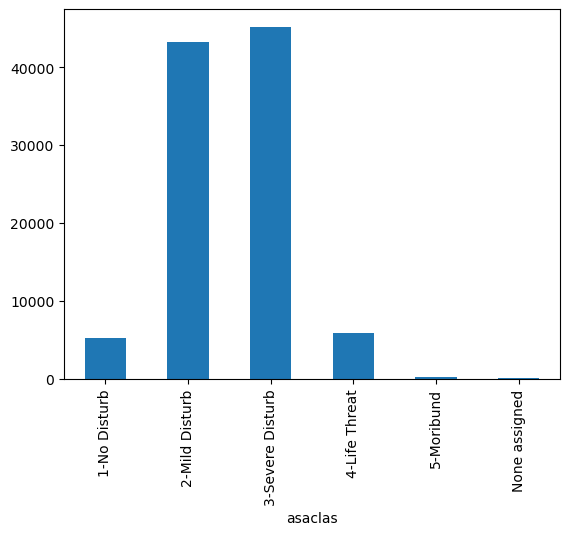

In [251]:
# Check the labels bias
clean_df.groupby(['asaclas']).size().plot.bar()

In [252]:
clean_df['asaclas'].value_counts()

3-Severe Disturb    45201
2-Mild Disturb      43215
4-Life Threat        5908
1-No Disturb         5278
5-Moribund            281
None assigned         117
Name: asaclas, dtype: int64

We can notice that there is a high bias in the labels for mild and severe so we need to generalize this

In [253]:
cols = clean_df.columns

## Feature selection

**First method:** drop high missing values ratio columns because our model would learn enough from these columns

In [254]:
missing_threshold = .6
high_ratio_col = []

for col in cols:
    missing_values_ratio = (clean_df[col].isna().sum() * 100) / clean_df[col].count()
    if missing_values_ratio >= missing_threshold:
        high_ratio_col.append(col)

In [255]:
high_ratio_col

['otherproc1',
 'othercpt1',
 'otherproc2',
 'othercpt2',
 'otherproc3',
 'othercpt3',
 'otherproc4',
 'othercpt4',
 'otherproc5',
 'othercpt5',
 'otherproc6',
 'othercpt6',
 'otherproc7',
 'othercpt7',
 'otherproc8',
 'othercpt8',
 'otherproc9',
 'othercpt9',
 'otherproc10',
 'othercpt10',
 'concurr1',
 'concpt1',
 'concurr2',
 'concpt2',
 'concurr3',
 'concpt3',
 'concurr4',
 'concpt4',
 'concurr5',
 'concpt5',
 'concurr6',
 'concpt6',
 'concurr7',
 'concpt7',
 'concurr8',
 'concpt8',
 'concurr9',
 'concpt9',
 'concurr10',
 'concpt10',
 'reoporcpt1',
 'retorrelated',
 'reoporicd91',
 'reopor1icd101',
 'reoperation2',
 'reopor2cpt1',
 'retor2related',
 'reopor2icd91',
 'reopor2icd101',
 'reoperation3',
 'unplannedreadmission1',
 'readmrelated1',
 'readmsuspreason1',
 'readmunrelsusp1',
 'readmrelicd91',
 'readmrelicd101',
 'readmunrelicd91',
 'readmunrelicd101',
 'readmission2',
 'unplannedreadmission2',
 'readmrelated2',
 'readmsuspreason2',
 'readmunrelsusp2',
 'readmrelicd102',
 'r

In [256]:
clean_df = clean_df.drop(high_ratio_col, axis=1)

In [257]:
clean_df

,Unnamed: 0,X,pufyear,caseid,sex,race_new,ethnicity_hispanic,prncptx,cpt,workrvu,...,readmission1,readmpodays1,readmpodays2,readmpodays3,readmpodays4,readmpodays5,wound_closure,othcdiff,nothcdiff,dothcdiff
0,1,1,2017,6574058,female,White,No,REVSC OPN/PRQ ILIAC ART W/STNT PLMT & ANGIOPLSTY,37221,9.75,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
1,2,2,2017,6574084,female,White,No,DBRDMT SKN SUBQ T/M/F NECRO INFCTJ ABDL WALL,11005,14.24,...,No,-99,-99,-99,-99,-99,No layers of incision are surgically closed,No Complication,0,-99
2,3,3,2017,6573711,male,White,No,EXPLORATORY LAPAROTOMY CELIOTOMY W/WO BIOPSY SPX,49000,12.54,...,Yes,14,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
3,4,4,2017,6572561,female,Asian,No,COLECTOMY PRTL W/COLOST/ILEOST & MUCOFISTULA,44144,29.91,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
4,5,5,2017,6571331,male,White,No,LAPAROSCOPIC APPENDECTOMY,44970,9.45,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,99996,2017,7105899,female,Unknown/Not Reported,Unknown,TX INTER/PR/SUBTRCHNTRIC FEM FX IMED IMPLTSCREW,27245,18.18,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
99996,99997,99997,2017,7105956,female,Unknown/Not Reported,Unknown,COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOS,44160,20.89,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
99997,99998,99998,2017,7104705,female,Unknown/Not Reported,Unknown,COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOS,44160,20.89,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99
99998,99999,99999,2017,7105427,female,Unknown/Not Reported,Unknown,OPTX FEM FX PROX END NCK INT FIXJ/PROSTC RPLCMT,27236,17.61,...,No,-99,-99,-99,-99,-99,All layers of incision (deep and superficial) ...,No Complication,0,-99


In [258]:
for col in clean_df.columns:
    print("Column: ", col)
    clean_df[col].info()

Column:  Unnamed: 0
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: Unnamed: 0
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
Column:  X
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: X
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
Column:  pufyear
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: pufyear
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
Column:  caseid
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: caseid
Non-Null Count   Dtype
--------------   -----
100000 non-null  int64
dtypes: int64(1)
memory usage: 781.4 KB
Column:  sex
<class 'pandas.core.series.Series'>
RangeIndex: 100000 entries, 0 to 99999
Series name: sex
Non-Null Count 

## Extract empty-miss Columns in text file


In [259]:
# These Features manually selected by human
selected_features = ['sex', 'prncptx', 'inout', 'transt', 'age', 'dischdest', 
                     'anesthes', 'surgspec', 'electsurg', 'height',
                     'weight', 'diabetes', 'smoke', 'dyspnea', 
                     'fnstatus2', 'ventilat', 'ascites', 'hxchf',
                     'renafail', 'dialysis', 'discancr', 'wndinf', 'steroid',
                     'wndclas', 'prsepis', 'dprna', 'dpralbum', 'dprhct', 'emergncy', 
                     'optime', 'nrenainsf', 'renainsf', 'drenainsf','asaclas']

In [260]:
len(selected_features)

34

In [261]:
features = clean_df[selected_features]

In [262]:
features.head()

,sex,prncptx,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,...,prsepis,dprna,dpralbum,dprhct,emergncy,optime,nrenainsf,renainsf,drenainsf,asaclas
0,female,REVSC OPN/PRQ ILIAC ART W/STNT PLMT & ANGIOPLSTY,Inpatient,Outside emergency department,50,Home,General,Vascular,No,61,...,SIRS,0,2,0,No,48,0,No Complication,-99,2-Mild Disturb
1,female,DBRDMT SKN SUBQ T/M/F NECRO INFCTJ ABDL WALL,Inpatient,From acute care hospital inpatient,55,"Skilled Care, Not Home",General,General Surgery,No,61,...,Septic Shock,0,1,0,Yes,27,0,No Complication,-99,4-Life Threat
2,male,EXPLORATORY LAPAROTOMY CELIOTOMY W/WO BIOPSY SPX,Inpatient,Not transferred (admitted from home),38,Home,General,General Surgery,No,70,...,SIRS,1,1,1,Yes,294,0,No Complication,-99,2-Mild Disturb
3,female,COLECTOMY PRTL W/COLOST/ILEOST & MUCOFISTULA,Inpatient,From acute care hospital inpatient,62,Hospice,General,General Surgery,No,61,...,None,1,1,1,Yes,126,0,No Complication,-99,3-Severe Disturb
4,male,LAPAROSCOPIC APPENDECTOMY,Outpatient,From acute care hospital inpatient,27,Home,General,General Surgery,No,65,...,None,0,0,0,Yes,43,0,No Complication,-99,1-No Disturb


In [263]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 34 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sex        100000 non-null  object
 1   prncptx    100000 non-null  object
 2   inout      100000 non-null  object
 3   transt     100000 non-null  object
 4   age        100000 non-null  object
 5   dischdest  99909 non-null   object
 6   anesthes   100000 non-null  object
 7   surgspec   100000 non-null  object
 8   electsurg  100000 non-null  object
 9   height     100000 non-null  int64 
 10  weight     100000 non-null  int64 
 11  diabetes   100000 non-null  object
 12  smoke      100000 non-null  object
 13  dyspnea    99998 non-null   object
 14  fnstatus2  99998 non-null   object
 15  ventilat   100000 non-null  object
 16  ascites    100000 non-null  object
 17  hxchf      100000 non-null  object
 18  renafail   100000 non-null  object
 19  dialysis   100000 non-null  object
 20  disca

In [264]:
features.describe()

,height,weight,dprna,dpralbum,dprhct,optime,nrenainsf,drenainsf
count,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000,100000.000000
mean,63.805870,185.545820,-5.376310,-31.55824,-2.56811,138.783270,0.003160,-98.655300
std,19.119342,56.757321,44.039537,59.16971,40.88570,106.834319,0.056125,6.151122
min,-99.000000,-99.000000,-99.000000,-99.00000,-99.00000,-99.000000,0.000000,-99.000000
25%,63.000000,150.000000,0.000000,-99.00000,0.00000,66.000000,0.000000,-99.000000
50%,66.000000,180.000000,5.000000,1.00000,6.00000,109.000000,0.000000,-99.000000
75%,69.000000,216.000000,15.000000,13.00000,15.00000,180.000000,0.000000,-99.000000
max,86.000000,650.000000,90.000000,90.00000,90.00000,1141.000000,1.000000,30.000000


In [265]:
features[features['age']=='90+'][:5]

,sex,prncptx,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,...,prsepis,dprna,dpralbum,dprhct,emergncy,optime,nrenainsf,renainsf,drenainsf,asaclas
85,female,COLECTOMY PRTL W/RMVL TERMINAL ILEUM & ILEOCOLOS,Inpatient,Not transferred (admitted from home),90+,"Skilled Care, Not Home",General,General Surgery,No,67,...,None,1,1,1,Yes,116,0,No Complication,-99,3-Severe Disturb
517,female,COLCT TOT ABDL W/O PRCTECT W/ILEOST/ILEOPXTS,Inpatient,Outside emergency department,90+,Rehab,General,General Surgery,No,65,...,Sepsis,0,0,0,Yes,216,0,No Complication,-99,4-Life Threat
929,male,DEBRIDEMENT MUSCLE & FASCIA 20 SQ CM/<,Inpatient,Not transferred (admitted from home),90+,Rehab,MAC/IV Sedation,General Surgery,No,71,...,None,0,11,0,No,42,0,No Complication,-99,3-Severe Disturb
1208,female,TEAEC W/WO PATCH GRAFT ILIOFEMORAL,Inpatient,Outside emergency department,90+,Home,General,Vascular,No,64,...,None,0,-99,0,No,389,0,No Complication,-99,3-Severe Disturb
1320,male,COLECTOMY PRTL W/COLOPROCTOSTOMY,Inpatient,Not transferred (admitted from home),90+,Expired,General,General Surgery,Yes,69,...,None,1,1,0,No,193,0,No Complication,-99,3-Severe Disturb


In [266]:
features['age'] = features['age'].replace('90+', 90)
features['age'] = features['age'].astype(int)

/tmp/ipykernel_32/234424497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['age'] = features['age'].replace('90+', 90)
/tmp/ipykernel_32/234424497.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['age'] = features['age'].astype(int)


In [267]:
features['age']

0        50
1        55
2        38
3        62
4        27
         ..
99995    90
99996    63
99997    27
99998    90
99999    63
Name: age, Length: 100000, dtype: int64

In [268]:
features['transt'].value_counts()

Not transferred (admitted from home)               94718
Outside emergency department                        2313
From acute care hospital inpatient                  2078
Nursing home - Chronic care - Intermediate care      542
Transfer from other                                  283
Unknown                                               66
Name: transt, dtype: int64

In [269]:
features['surgspec'].value_counts()

General Surgery               54192
Orthopedics                   13619
Vascular                       7424
Gynecology                     6250
Urology                        5908
Neurosurgery                   5664
Plastics                       2823
Thoracic                       1942
Otolaryngology (ENT)           1668
Cardiac Surgery                 509
Interventional Radiologist        1
Name: surgspec, dtype: int64

In [270]:
features['anesthes'].value_counts()

General            89418
MAC/IV Sedation     5893
Spinal              3793
Regional             409
Other                175
Local                137
Epidural              90
None                  85
Name: anesthes, dtype: int64

In [271]:
features['wndclas'].value_counts()

1-Clean                 50454
2-Clean/Contaminated    36257
3-Contaminated           7625
4-Dirty/Infected         5663
Name: wndclas, dtype: int64

In [272]:
features['asaclas'].value_counts()

3-Severe Disturb    45201
2-Mild Disturb      43215
4-Life Threat        5908
1-No Disturb         5278
5-Moribund            281
None assigned         117
Name: asaclas, dtype: int64

In [273]:
features['asaclas'] = features['asaclas'].replace('3-Severe Disturb','yes')
features['asaclas'] = features['asaclas'].replace('4-Life Threat','yes')
features['asaclas'] = features['asaclas'].replace('5-Moribund','yes')

features['asaclas'] = features['asaclas'].replace('2-Mild Disturb','no')
features['asaclas'] = features['asaclas'].replace('1-No Disturb','no')

features['asaclas'] = features['asaclas'].replace('None assigned','unknown')

/tmp/ipykernel_32/1527691075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['asaclas'] = features['asaclas'].replace('3-Severe Disturb','yes')
/tmp/ipykernel_32/1527691075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['asaclas'] = features['asaclas'].replace('4-Life Threat','yes')
/tmp/ipykernel_32/1527691075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [274]:
features_copy = features.copy()

In [275]:
cols = list(features_copy.columns)

In [276]:
cols

['sex',
 'prncptx',
 'inout',
 'transt',
 'age',
 'dischdest',
 'anesthes',
 'surgspec',
 'electsurg',
 'height',
 'weight',
 'diabetes',
 'smoke',
 'dyspnea',
 'fnstatus2',
 'ventilat',
 'ascites',
 'hxchf',
 'renafail',
 'dialysis',
 'discancr',
 'wndinf',
 'steroid',
 'wndclas',
 'prsepis',
 'dprna',
 'dpralbum',
 'dprhct',
 'emergncy',
 'optime',
 'nrenainsf',
 'renainsf',
 'drenainsf',
 'asaclas']

### Check for columns that have a bias

In [277]:
for col in cols:
    print(features_copy[col].value_counts())
    print('---------------------------------')

female    56442
male      43558
Name: sex, dtype: int64
---------------------------------
ARTHRP KNE CONDYLE&PLATU MEDIAL&LAT COMPARTMENTS    5540
LAPAROSCOPY SURG CHOLECYSTECTOMY                    3512
LAPAROSCOPIC APPENDECTOMY                           3462
ARTHRP ACETBLR/PROX FEM PROSTC AGRFT/ALGRFT         2508
LAPS GSTRC RSTRICTIV PX LONGITUDINAL GASTRECTOMY    2170
                                                    ... 
INTRACRANIAL ARVEN MALFRMJ SUPRATENTRL SMPL            1
CYSTOTOMY EXCISE BLADDER DIVERTICULUM 1/MULTIPLE       1
DELAY FLAP/SECTIONING FLAP SCALP ARMS/LEGS             1
NDSC ABLATION & RCNSTJ ATRIA LIMITED W/O BYPAS         1
SUTURE 1 NERVE HAND/FOOT COMMON SENSORY NERVE          1
Name: prncptx, Length: 1625, dtype: int64
---------------------------------
Inpatient     66392
Outpatient    33608
Name: inout, dtype: int64
---------------------------------
Not transferred (admitted from home)               94718
Outside emergency department                      

In [278]:
high_bias_features = ['transt', 'dischdest', 'anesthes', 'electsurg', 'diabetes', 'prsepis', 'emergncy']
high_variance_features =  ['surgspec']
should_be_dropped = ['ventilat', 'ascites', 'hxchf','renafail', 'dialysis', 'nrenainsf', 'renainsf', 'fnstatus2', 'prncptx']

In [279]:
features_copy.drop(should_be_dropped, axis=1, inplace=True)

In [280]:
for col in high_bias_features:
    print(features_copy[col].value_counts())
    print('-------------------------------')

Not transferred (admitted from home)               94718
Outside emergency department                        2313
From acute care hospital inpatient                  2078
Nursing home - Chronic care - Intermediate care      542
Transfer from other                                  283
Unknown                                               66
Name: transt, dtype: int64
-------------------------------
Home                            90096
Skilled Care, Not Home           4867
Rehab                            2733
Facility Which was Home           846
Expired                           780
Separate Acute Care               286
Hospice                           157
Against Medical Advice (AMA)       75
Unskilled Facility Not Home        33
Unknown                            29
Multi-level Senior Community        7
Name: dischdest, dtype: int64
-------------------------------
General            89418
MAC/IV Sedation     5893
Spinal              3793
Regional             409
Other              

In [281]:
features_copy['transt'] = features_copy['transt'].replace('Nursing home - Chronic care - Intermediate care', 'Other')
features_copy['transt'] = features_copy['transt'].replace('Transfer from other', 'Other')

In [282]:
features_copy['dischdest'] = features_copy['dischdest'].replace('Facility Which was Home', 'Other')
features_copy['dischdest'] = features_copy['dischdest'].replace('Expired', 'Other')
features_copy['dischdest'] = features_copy['dischdest'].replace('Separate Acute Care', 'Other')
features_copy['dischdest'] = features_copy['dischdest'].replace('Hospice', 'Other')
features_copy['dischdest'] = features_copy['dischdest'].replace('Against Medical Advice (AMA)', 'Other')
features_copy['dischdest'] = features_copy['dischdest'].replace('Unskilled Facility Not Home', 'Other')
features_copy['dischdest'] = features_copy['dischdest'].replace('Multi-level Senior Community', 'Other')

In [283]:
features_copy['anesthes'] = features_copy['anesthes'].replace('Regional', 'Other') 
features_copy['anesthes'] = features_copy['anesthes'].replace('Local', 'Other') 
features_copy['anesthes'] = features_copy['anesthes'].replace('Epidural', 'Other') 
features_copy['anesthes'] = features_copy['anesthes'].replace('None', 'Other') 

In [284]:
features_copy['prsepis'] = features_copy['prsepis'].replace('Septic Shock', 'yes')
features_copy['prsepis'] = features_copy['prsepis'].replace('SIRS', 'yes')
features_copy['prsepis'] = features_copy['prsepis'].replace('Sepsis', 'yes')
features_copy['prsepis'] = features_copy['prsepis'].replace('None', 'no')

In [285]:
features_copy

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,asaclas
0,female,Inpatient,Outside emergency department,50,Home,General,Vascular,No,61,152,...,No,1-Clean,yes,0,2,0,No,48,-99,no
1,female,Inpatient,From acute care hospital inpatient,55,"Skilled Care, Not Home",General,General Surgery,No,61,200,...,No,4-Dirty/Infected,yes,0,1,0,Yes,27,-99,yes
2,male,Inpatient,Not transferred (admitted from home),38,Home,General,General Surgery,No,70,202,...,No,2-Clean/Contaminated,yes,1,1,1,Yes,294,-99,no
3,female,Inpatient,From acute care hospital inpatient,62,Other,General,General Surgery,No,61,130,...,No,4-Dirty/Infected,no,1,1,1,Yes,126,-99,yes
4,male,Outpatient,From acute care hospital inpatient,27,Home,General,General Surgery,No,65,135,...,No,3-Contaminated,no,0,0,0,Yes,43,-99,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,female,Inpatient,Not transferred (admitted from home),90,Rehab,General,Orthopedics,No,-99,-99,...,No,1-Clean,no,0,-99,0,Yes,22,-99,yes
99996,female,Inpatient,From acute care hospital inpatient,63,Home,General,General Surgery,No,-99,-99,...,No,2-Clean/Contaminated,no,0,3,0,Yes,90,-99,no
99997,female,Inpatient,Not transferred (admitted from home),27,Home,General,General Surgery,No,62,117,...,Yes,2-Clean/Contaminated,yes,0,9,0,Yes,92,-99,no
99998,female,Inpatient,Other,90,Other,Spinal,Orthopedics,No,59,-99,...,No,1-Clean,no,2,2,2,Yes,44,-99,yes


In [286]:
features_copy.isna().sum()

sex           0
inout         0
transt        0
age           0
dischdest    91
anesthes      0
surgspec      0
electsurg     0
height        0
weight        0
diabetes      0
smoke         0
dyspnea       2
discancr      0
wndinf        0
steroid       0
wndclas       1
prsepis       2
dprna         0
dpralbum      0
dprhct        0
emergncy      0
optime        0
drenainsf     0
asaclas       0
dtype: int64

In [287]:
features_copy.dropna(axis=0, inplace=True)

In [288]:
features_copy = features_copy.replace(-99, 0)

In [289]:
features_copy['asaclas'].value_counts()

yes        51305
no         48485
unknown      117
Name: asaclas, dtype: int64

In [290]:
indx = features_copy[features_copy['asaclas']=='unknown'].index

features_copy.drop(indx, axis=0, inplace=True)

In [291]:
train_dataset = features_copy.sample(frac=0.8, random_state=0)
test_dataset = features_copy.drop(train_dataset.index)

In [292]:
labels = train_dataset['asaclas']
train_dataset.drop(['asaclas'], axis=1, inplace=True)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


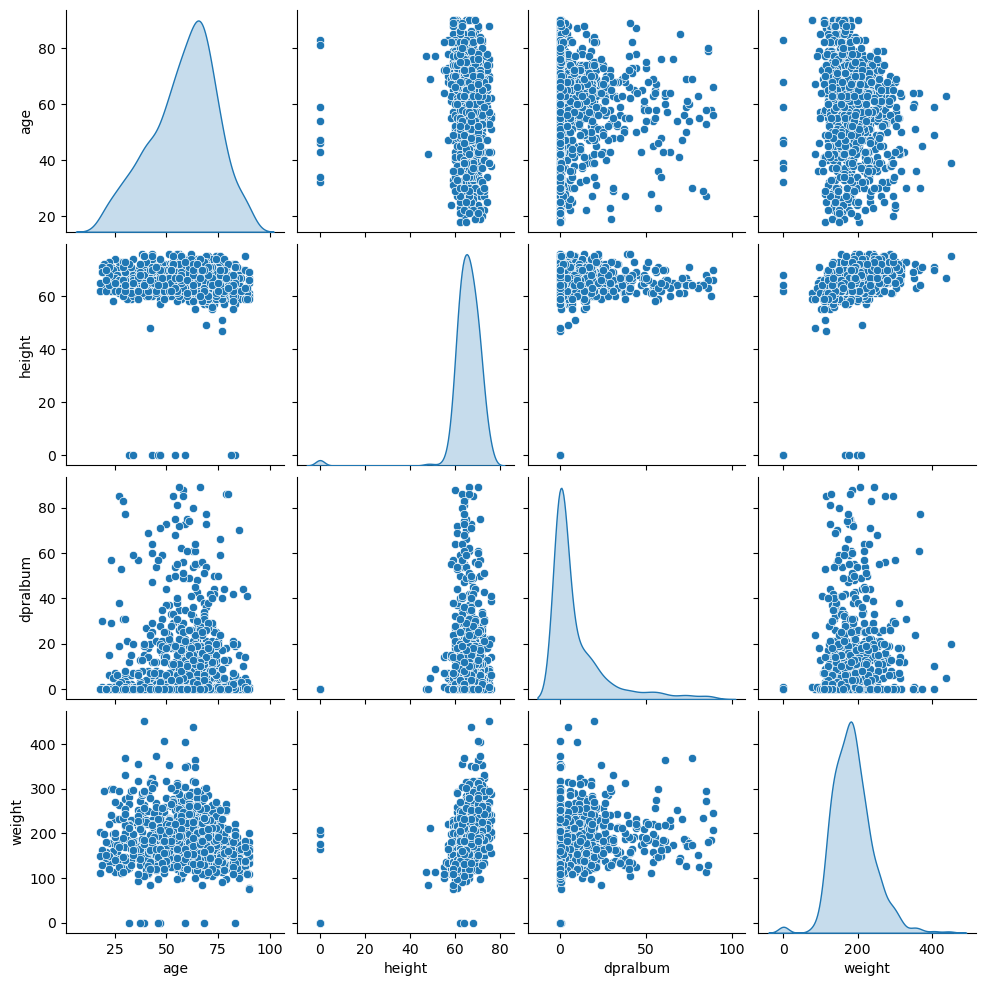

In [293]:
import seaborn as sns

sns.pairplot(features_copy[['age', 'height', 'dpralbum', 'weight']].sample(1000), diag_kind='kde')

In [294]:
features_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99790 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        99790 non-null  object
 1   inout      99790 non-null  object
 2   transt     99790 non-null  object
 3   age        99790 non-null  int64 
 4   dischdest  99790 non-null  object
 5   anesthes   99790 non-null  object
 6   surgspec   99790 non-null  object
 7   electsurg  99790 non-null  object
 8   height     99790 non-null  int64 
 9   weight     99790 non-null  int64 
 10  diabetes   99790 non-null  object
 11  smoke      99790 non-null  object
 12  dyspnea    99790 non-null  object
 13  discancr   99790 non-null  object
 14  wndinf     99790 non-null  object
 15  steroid    99790 non-null  object
 16  wndclas    99790 non-null  object
 17  prsepis    99790 non-null  object
 18  dprna      99790 non-null  int64 
 19  dpralbum   99790 non-null  int64 
 20  dprhct     99790 non-null  i

In [295]:
features_copy['age'].describe()

count    99790.000000
mean        57.558403
std         15.949054
min         18.000000
25%         47.000000
50%         59.000000
75%         69.000000
max         90.000000
Name: age, dtype: float64

In [296]:
features_copy['height'].describe()

count    99790.000000
mean        65.091482
std          8.517059
min          0.000000
25%         63.000000
50%         66.000000
75%         69.000000
max         86.000000
Name: height, dtype: float64

In [297]:
outlier = features_copy[features_copy['height'] == 0.0]

features_copy.drop(outlier.index, axis=0, inplace=True)

In [298]:
features_copy['weight'].describe()

count    98498.000000
mean       187.352870
std         52.206485
min          0.000000
25%        150.000000
50%        180.000000
75%        216.000000
max        650.000000
Name: weight, dtype: float64

In [299]:
outlier = features_copy[features_copy['weight'] == 0.0]

features_copy.drop(outlier.index, axis=0, inplace=True)

In [300]:
for col in features_copy.columns:
    print(features_copy[col].value_counts())
    print("--------------------------")

female    55660
male      42724
Name: sex, dtype: int64
--------------------------
Inpatient     65336
Outpatient    33048
Name: inout, dtype: int64
--------------------------
Not transferred (admitted from home)    93344
Outside emergency department             2191
From acute care hospital inpatient       1999
Other                                     785
Unknown                                    65
Name: transt, dtype: int64
--------------------------
65    2639
68    2565
70    2535
63    2513
69    2500
      ... 
20     364
19     341
89     301
88     290
18     275
Name: age, Length: 73, dtype: int64
--------------------------
Home                      88839
Skilled Care, Not Home     4788
Rehab                      2675
Other                      2053
Unknown                      29
Name: dischdest, dtype: int64
--------------------------
General            87964
MAC/IV Sedation     5840
Spinal              3740
Other                840
Name: anesthes, dtype: int64
----------

In [301]:
bias_solver = {}
for col in features_copy.columns:
    if features_copy[col].dtype == 'O':
        uniques = features_copy[col].unique()
        for uni in uniques:
            if uni == 'Unknown' or uni == 'unknown':
                indx = features_copy[features_copy[col]== uni].index
                features_copy.drop(indx, axis=0, inplace=True)
            elif features_copy[col][features_copy[col] == uni].count() > 999:
                sample = features_copy[features_copy[col] == uni].sample(1000)
                bias_solver[col] = sample

In [302]:
features_copy.to_csv('Clean_postoperative_delirium.csv')

In [303]:
dataframe = pd.DataFrame(columns = features_copy.columns)
for key in bias_solver.keys():
    dataframe = pd.concat([dataframe, bias_solver[key]])

In [304]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 60750 to 16557
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sex        17000 non-null  object
 1   inout      17000 non-null  object
 2   transt     17000 non-null  object
 3   age        17000 non-null  object
 4   dischdest  17000 non-null  object
 5   anesthes   17000 non-null  object
 6   surgspec   17000 non-null  object
 7   electsurg  17000 non-null  object
 8   height     17000 non-null  object
 9   weight     17000 non-null  object
 10  diabetes   17000 non-null  object
 11  smoke      17000 non-null  object
 12  dyspnea    17000 non-null  object
 13  discancr   17000 non-null  object
 14  wndinf     17000 non-null  object
 15  steroid    17000 non-null  object
 16  wndclas    17000 non-null  object
 17  prsepis    17000 non-null  object
 18  dprna      17000 non-null  object
 19  dpralbum   17000 non-null  object
 20  dprhct     17000 non-nul

In [305]:
for col in dataframe.columns:
    print(dataframe[col].value_counts())
    print("--------------------------")

female    8646
male      8354
Name: sex, dtype: int64
--------------------------
Inpatient     12397
Outpatient     4603
Name: inout, dtype: int64
--------------------------
Not transferred (admitted from home)    15560
Outside emergency department              617
From acute care hospital inpatient        593
Other                                     230
Name: transt, dtype: int64
--------------------------
64    490
68    485
70    484
65    473
62    458
     ... 
20     63
88     62
19     55
21     54
18     49
Name: age, Length: 73, dtype: int64
--------------------------
Home                      13663
Rehab                      1681
Skilled Care, Not Home     1140
Other                       515
Unknown                       1
Name: dischdest, dtype: int64
--------------------------
General            14632
Spinal              1395
MAC/IV Sedation      849
Other                124
Name: anesthes, dtype: int64
--------------------------
General Surgery         8526
Orthopedics  

In [306]:
dataframe['asaclas'][dataframe['asaclas']=='yes'] = "Yes"
dataframe['asaclas'][dataframe['asaclas']=='no'] = "No"
dataframe['prsepis'][dataframe['prsepis']=='yes'] = "Yes"
dataframe['prsepis'][dataframe['prsepis']=='no'] = "No"

In [307]:
yes_no_col = []
binary_col = []
other_col = []
for col in features_copy.columns:
    if features_copy[col].dtype == 'O':
        uniques = features_copy[col].unique()
        if 'Yes' in uniques and 'No' in uniques or 'yes' in uniques and 'no' in uniques:
            yes_no_col.append(col)
        elif len(uniques) == 2:
            binary_col.append(col)
        else:
            other_col.append(col)

In [308]:
yes_no_col

['electsurg',
 'smoke',
 'discancr',
 'wndinf',
 'steroid',
 'prsepis',
 'emergncy',
 'asaclas']

In [309]:
binary_col

['sex', 'inout']

In [310]:
other_col

['transt',
 'dischdest',
 'anesthes',
 'surgspec',
 'diabetes',
 'dyspnea',
 'wndclas']

In [311]:
def yes_no_encoder(series):
    series=series.replace('No', 0)
    series=series.replace('Yes', 1)
    series=series.replace('no', 0)
    series=series.replace('yes', 1)
    return series

In [312]:
yes_no_encoder(dataframe['asaclas'])

60750    1
65229    1
24273    1
58641    1
74113    1
        ..
9662     1
85742    1
18112    1
33780    1
16557    1
Name: asaclas, Length: 17000, dtype: int64

In [313]:
dataframe[yes_no_col] = dataframe[yes_no_col].apply(yes_no_encoder)

In [314]:
dataframe.head()

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,asaclas
60750,male,Inpatient,Not transferred (admitted from home),59,Home,General,Urology,1,70,170,...,0,2-Clean/Contaminated,0,7,0,7,0,165,0,1
65229,male,Inpatient,Not transferred (admitted from home),77,Home,General,Orthopedics,1,70,229,...,0,1-Clean,0,17,17,17,0,98,0,1
24273,male,Inpatient,Not transferred (admitted from home),64,Home,General,General Surgery,1,70,344,...,0,2-Clean/Contaminated,0,4,4,4,0,79,0,1
58641,male,Inpatient,Not transferred (admitted from home),48,Home,General,Neurosurgery,0,67,190,...,0,1-Clean,0,0,3,0,0,265,0,1
74113,male,Outpatient,Not transferred (admitted from home),76,Home,General,General Surgery,1,74,274,...,0,1-Clean,0,12,0,0,0,132,0,1


In [315]:
dataframe[other_col].head()

,transt,dischdest,anesthes,surgspec,diabetes,dyspnea,wndclas
60750,Not transferred (admitted from home),Home,General,Urology,NO,No,2-Clean/Contaminated
65229,Not transferred (admitted from home),Home,General,Orthopedics,NO,No,1-Clean
24273,Not transferred (admitted from home),Home,General,General Surgery,NON-INSULIN,No,2-Clean/Contaminated
58641,Not transferred (admitted from home),Home,General,Neurosurgery,NO,No,1-Clean
74113,Not transferred (admitted from home),Home,General,General Surgery,NON-INSULIN,No,1-Clean


In [316]:
def binary_encoder(series):
    uni = series.unique()
    series = series.replace(uni[0], 0)
    series = series.replace(uni[1], 1)
    decoder={0: uni[0], 1:uni[1]}
    print(decoder)
    return series

In [317]:
dataframe[binary_col] = dataframe[binary_col].apply(binary_encoder)

{0: 'male', 1: 'female'}
{0: 'Inpatient', 1: 'Outpatient'}


In [318]:
dataframe[binary_col]

,sex,inout
60750,0,0
65229,0,0
24273,0,0
58641,0,0
74113,0,1
...,...,...
9662,0,0
85742,1,0
18112,0,1
33780,0,0


In [319]:
def multiclass_encoder(series):
    decoder = {}
    uni = series.unique()
    for i in range(len(uni)):
        series = series.replace(uni[i], i)
        decoder[i] = uni[i]
    print(decoder)
    return series

In [320]:
multiclass_encoder(dataframe[other_col[0]])

{0: 'Not transferred (admitted from home)', 1: 'From acute care hospital inpatient', 2: 'Outside emergency department', 3: 'Other'}


60750    0
65229    0
24273    0
58641    0
74113    0
        ..
9662     0
85742    0
18112    0
33780    0
16557    0
Name: transt, Length: 17000, dtype: int64

In [321]:
dataframe[other_col] = dataframe[other_col].apply(multiclass_encoder)

{0: 'Not transferred (admitted from home)', 1: 'From acute care hospital inpatient', 2: 'Outside emergency department', 3: 'Other'}
{0: 'Home', 1: 'Other', 2: 'Rehab', 3: 'Skilled Care, Not Home', 4: 'Unknown'}
{0: 'General', 1: 'MAC/IV Sedation', 2: 'Spinal', 3: 'Other'}
{0: 'Urology', 1: 'Orthopedics', 2: 'General Surgery', 3: 'Neurosurgery', 4: 'Thoracic', 5: 'Otolaryngology (ENT)', 6: 'Vascular', 7: 'Plastics', 8: 'Cardiac Surgery', 9: 'Gynecology'}
{0: 'NO', 1: 'NON-INSULIN', 2: 'INSULIN'}
{0: 'No', 1: 'MODERATE EXERTION', 2: 'AT REST'}
{0: '2-Clean/Contaminated', 1: '1-Clean', 2: '4-Dirty/Infected', 3: '3-Contaminated'}


In [322]:
dataframe.head()

,sex,inout,transt,age,dischdest,anesthes,surgspec,electsurg,height,weight,...,steroid,wndclas,prsepis,dprna,dpralbum,dprhct,emergncy,optime,drenainsf,asaclas
60750,0,0,0,59,0,0,0,1,70,170,...,0,0,0,7,0,7,0,165,0,1
65229,0,0,0,77,0,0,1,1,70,229,...,0,1,0,17,17,17,0,98,0,1
24273,0,0,0,64,0,0,2,1,70,344,...,0,0,0,4,4,4,0,79,0,1
58641,0,0,0,48,0,0,3,0,67,190,...,0,1,0,0,3,0,0,265,0,1
74113,0,1,0,76,0,0,2,1,74,274,...,0,1,0,12,0,0,0,132,0,1


In [323]:
dataframe.to_csv('final_preprocessed_dataset_for_postoperative.csv')